Found 6579 images belonging to 38 classes.
Found 2172 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


206/206 ━━━━━━━━━━━━━━━━━━━━ 243s 921ms/step - accuracy: 0.0380 - loss: 3.6257 - val_accuracy: 0.0078 - val_loss: 3.6403
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 131s 624ms/step - accuracy: 0.0734 - loss: 3.5575 - val_accuracy: 0.0437 - val_loss: 3.5632
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 131s 622ms/step - accuracy: 0.1029 - loss: 3.4635 - val_accuracy: 0.0990 - val_loss: 3.4628
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 131s 625ms/step - accuracy: 0.0995 - loss: 3.4852 - val_accuracy: 0.0382 - val_loss: 3.6051
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 132s 628ms/step - accuracy: 0.1149 - loss: 3.3863 - val_accuracy: 0.1179 - val_loss: 3.4125
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 131s 624ms/step - accuracy: 0.1291 - loss: 3.3653 - val_accuracy: 0.1160 - val_loss: 3.3593
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - accuracy: 0.1446 - loss: 3.3446 - val_accuracy: 0.0783 - val_loss: 3.5973
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 132s 626ms/step - accuracy: 0.1585 - loss: 3.33

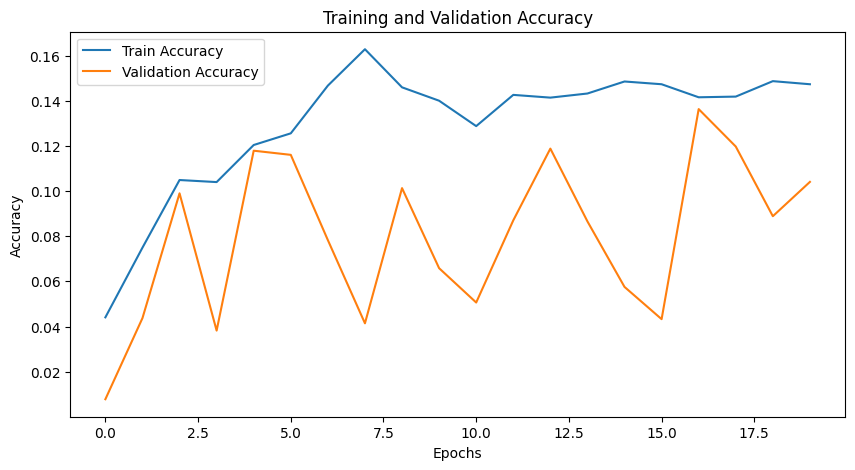

330/330 ━━━━━━━━━━━━━━━━━━━━ 49s 145ms/step


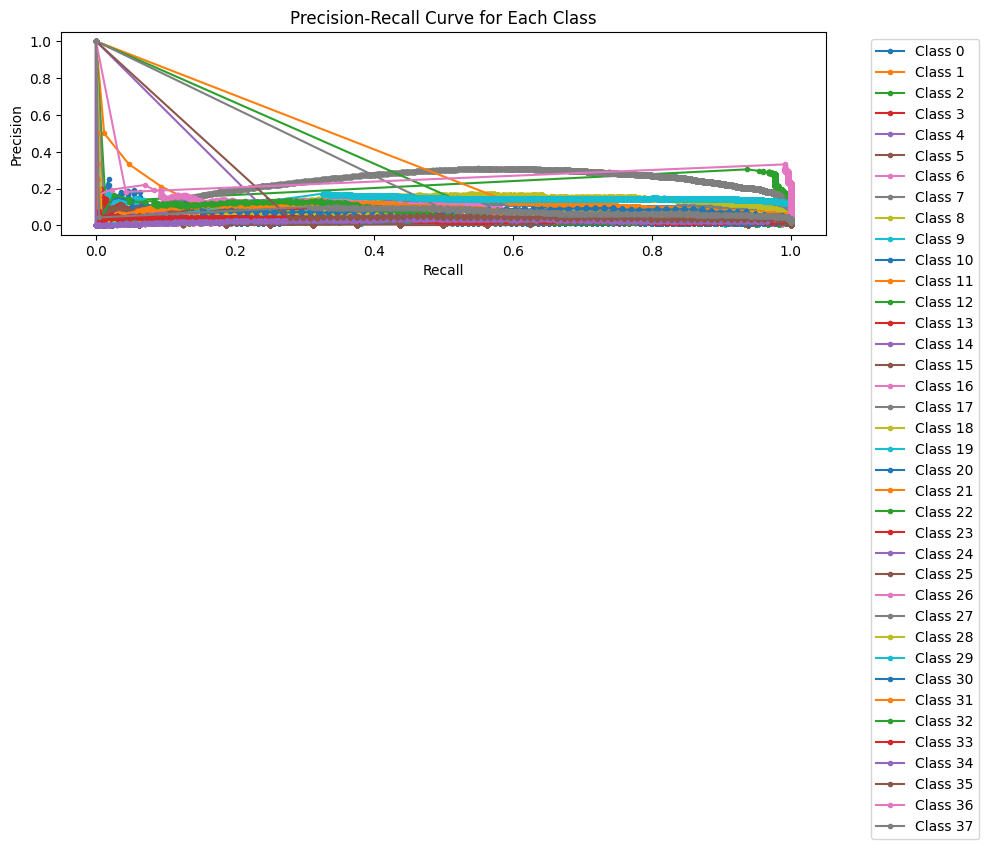

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve

def segnet_model(input_size=(224, 224, 3), num_classes=38):
    inputs = Input(input_size)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    # Decoder
    up6 = UpSampling2D(size=(2, 2))(pool5)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(512, 3, activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(256, 3, activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(128, 3, activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    up10 = UpSampling2D(size=(2, 2))(conv9)
    conv10 = Conv2D(64, 3, activation='relu', padding='same')(up10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(64, 3, activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)

    conv11 = Conv2D(num_classes, 1, activation='softmax')(conv10)
    gap = GlobalAveragePooling2D()(conv11)
    output = Dense(num_classes, activation='softmax')(gap)

    model = Model(inputs, output)
    return model

def main():
    # Update paths for Kaggle environment
    train_folder = '/kaggle/input/plant-village/train/train'
    test_folder = '/kaggle/input/plant-village/test/test'

    # Data augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.25
    )

    # Only rescaling for testing
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Load data using flow_from_directory
    train_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        subset='validation'
    )

    test_generator = test_datagen.flow_from_directory(
        test_folder,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        shuffle=False
    )

    # Get number of classes
    num_classes = len(train_generator.class_indices)

    # Create and compile model
    model = segnet_model(input_size=(224, 224, 3), num_classes=num_classes)
    model.compile(
        optimizer=Adam(learning_rate=0.0007),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Calculate class weights
    class_weights = compute_class_weight(
        "balanced",
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weight_dict = dict(enumerate(class_weights))

    # Train model
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=20,
        class_weight=class_weight_dict
    )

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Final Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

    # Generate predictions for PR curve
    test_predictions = model.predict(test_generator)
    y_true = tf.keras.utils.to_categorical(test_generator.classes, num_classes)

    # Plot PR curves
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], test_predictions[:, i])
        plt.plot(recall, precision, marker='.', label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Each Class')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()